In [ ]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = r"C:\Users\isaac\Documents\groceries - groceries.csv"
df = pd.read_csv(data)
item_columns = df.columns[1:]
processed_df = df[item_columns][df['Item(s)'] > 1]
processed_df = processed_df.fillna(0)

list_of_row_values = []
for i in processed_df.to_dict('records'):
    list_of_row_values.append([value for value in i.values()])

cleaned_list_of_row_values = []
for list in list_of_row_values:
   new_list = [item for item in list if item !=0]
   cleaned_list_of_row_values.append(new_list)

all_items = []
for list in list_of_row_values:
   for item in list:
      if item != 0:
        all_items.append(item)

unique_items=[]
for item in all_items:
    if item not in unique_items:
        unique_items.append(item)

item_combos2 = [a for a in itertools.combinations_with_replacement(unique_items, 2)]
count_of_combos={}
for a,b in item_combos2:
    counter=0
    for bag in cleaned_list_of_row_values:
        if a in bag and b in bag:
            counter += 1
    count_of_combos[a,b] = counter

grocery_items_list=[]
temp=[]
for a, b in count_of_combos.keys():
    grocery_items_list.append(f'{a}-{b}')
grocery_items = pd.Series(grocery_items_list)

counts = pd.Series([count for count in count_of_combos.values()])

In [94]:
list_of_row_values = []
for i in processed_df.to_dict('records'):
    list_of_row_values.append([value for value in i.values()])

In [95]:
cleaned_list_of_row_values = []
for list in list_of_row_values:
   new_list = [item for item in list if item !=0]
   cleaned_list_of_row_values.append(new_list)

In [97]:
all_items = []
for list in list_of_row_values:
   for item in list:
      if item != 0:
        all_items.append(item)

In [ ]:
unique_items=[]
for item in all_items:
    if item not in unique_items:
        unique_items.append(item)

unique_items


In [134]:
len(unique_items)

169

The following code counts how many times each pair appears throughout all of the market baskets.
A dictionary is made with the item pair as key and its count as value.

In [145]:
item_combos2 = [a for a in itertools.combinations_with_replacement(unique_items, 2)]
count_of_combos={}
for a,b in item_combos2:
    counter=0
    for bag in cleaned_list_of_row_values:
        if a in bag and b in bag:
            counter += 1
    count_of_combos[a,b] = counter
        

Then, in order to prepare for plotting in MatplotLib, I decompose the item pair tuple into a string so that it can be added to a list, then to a series.

In [ ]:
grocery_items_list=[]
temp=[]
for a, b in count_of_combos.keys():
    grocery_items_list.append(f'{a}-{b}')
grocery_items = pd.Series(grocery_items_list)

counts = pd.Series([count for count in count_of_combos.values()])

In [ ]:
counts = pd.Series([count for count in count_of_combos.values()])
counts


In [22]:
type(count_of_combos.items())

dict_items

In [25]:
len(count_of_combos)

14365

In [ ]:

plt.figure(figsize=(17,7.5))
plt.plot(grocery_items, counts, color = 'blue')
plt.xlabel('grocery_items')
plt.ylabel('counts')
plt.title('grocery_items_counts')
plt.xticks(grocery_items)

plt.axhline(y = counts.mean(), color = 'green')

plt.xticks(rotation = 80)
plt.show()

After visualizing, it is clear I have too many pairs. Before filtering the pairs, I sort them by the values
Source: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value 

In [30]:
clean_dict = dict(sorted(count_of_combos.items(), key = lambda item: item[1]))

clean_dict = {pair: count for pair, count in clean_dict.items() if count > 0}
clean_dict.values()

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In order to get a sense of the distribution of  counts, I created a new dictionary.
Here, the keys are the counts and the values are the number of item pairs that have that count.
For example, the key 1 refers to pairs that only show up once. However, this analysis revealed that
21% of the pairs only show up once.

In [45]:
percentile_dict={}
already_counted = []
for i in clean_dict.values():
    counter = 0
    if i not in already_counted:
        for j in clean_dict.values():
            if i == j:
                counter +=1
        already_counted.append(i)
        percentile_dict[f'{i}'] = (counter/len(clean_dict.values())) * 100


Around 21% of pairs only appear once. Next, make a histogram to visualize how often pair counts appear

In [46]:
percentile_dict

{'1': 21.580826109127997,
 '2': 13.034166241713411,
 '3': 8.383477817440081,
 '4': 6.557878633350331,
 '5': 5.130035696073431,
 '6': 4.038755736868945,
 '7': 3.5696073431922484,
 '8': 3.0596634370219276,
 '9': 2.651708312085671,
 '10': 2.0601733809280978,
 '11': 2.039775624681285,
 '12': 1.580826109127996,
 '13': 1.3360530341662418,
 '14': 1.4176440591534931,
 '15': 1.2034676185619582,
 '16': 1.2544620091789904,
 '17': 0.8975012748597654,
 '18': 0.8669046404895462,
 '19': 0.7751147373788884,
 '20': 0.6017338092809791,
 '21': 0.8261091279959205,
 '22': 0.6833248342682305,
 '23': 0.5711371749107598,
 '24': 0.7139214686384497,
 '25': 0.49974502804691484,
 '26': 0.46914839367669553,
 '27': 0.47934727180010195,
 '28': 0.33656297807241203,
 '29': 0.3671596124426313,
 '30': 0.5099439061703213,
 '31': 0.5201427842937277,
 '32': 0.3875573686894442,
 '33': 0.2753697093319735,
 '34': 0.25497195308516063,
 '35': 0.2855685874553799,
 '36': 0.2753697093319735,
 '37': 0.3671596124426313,
 '38': 0.326

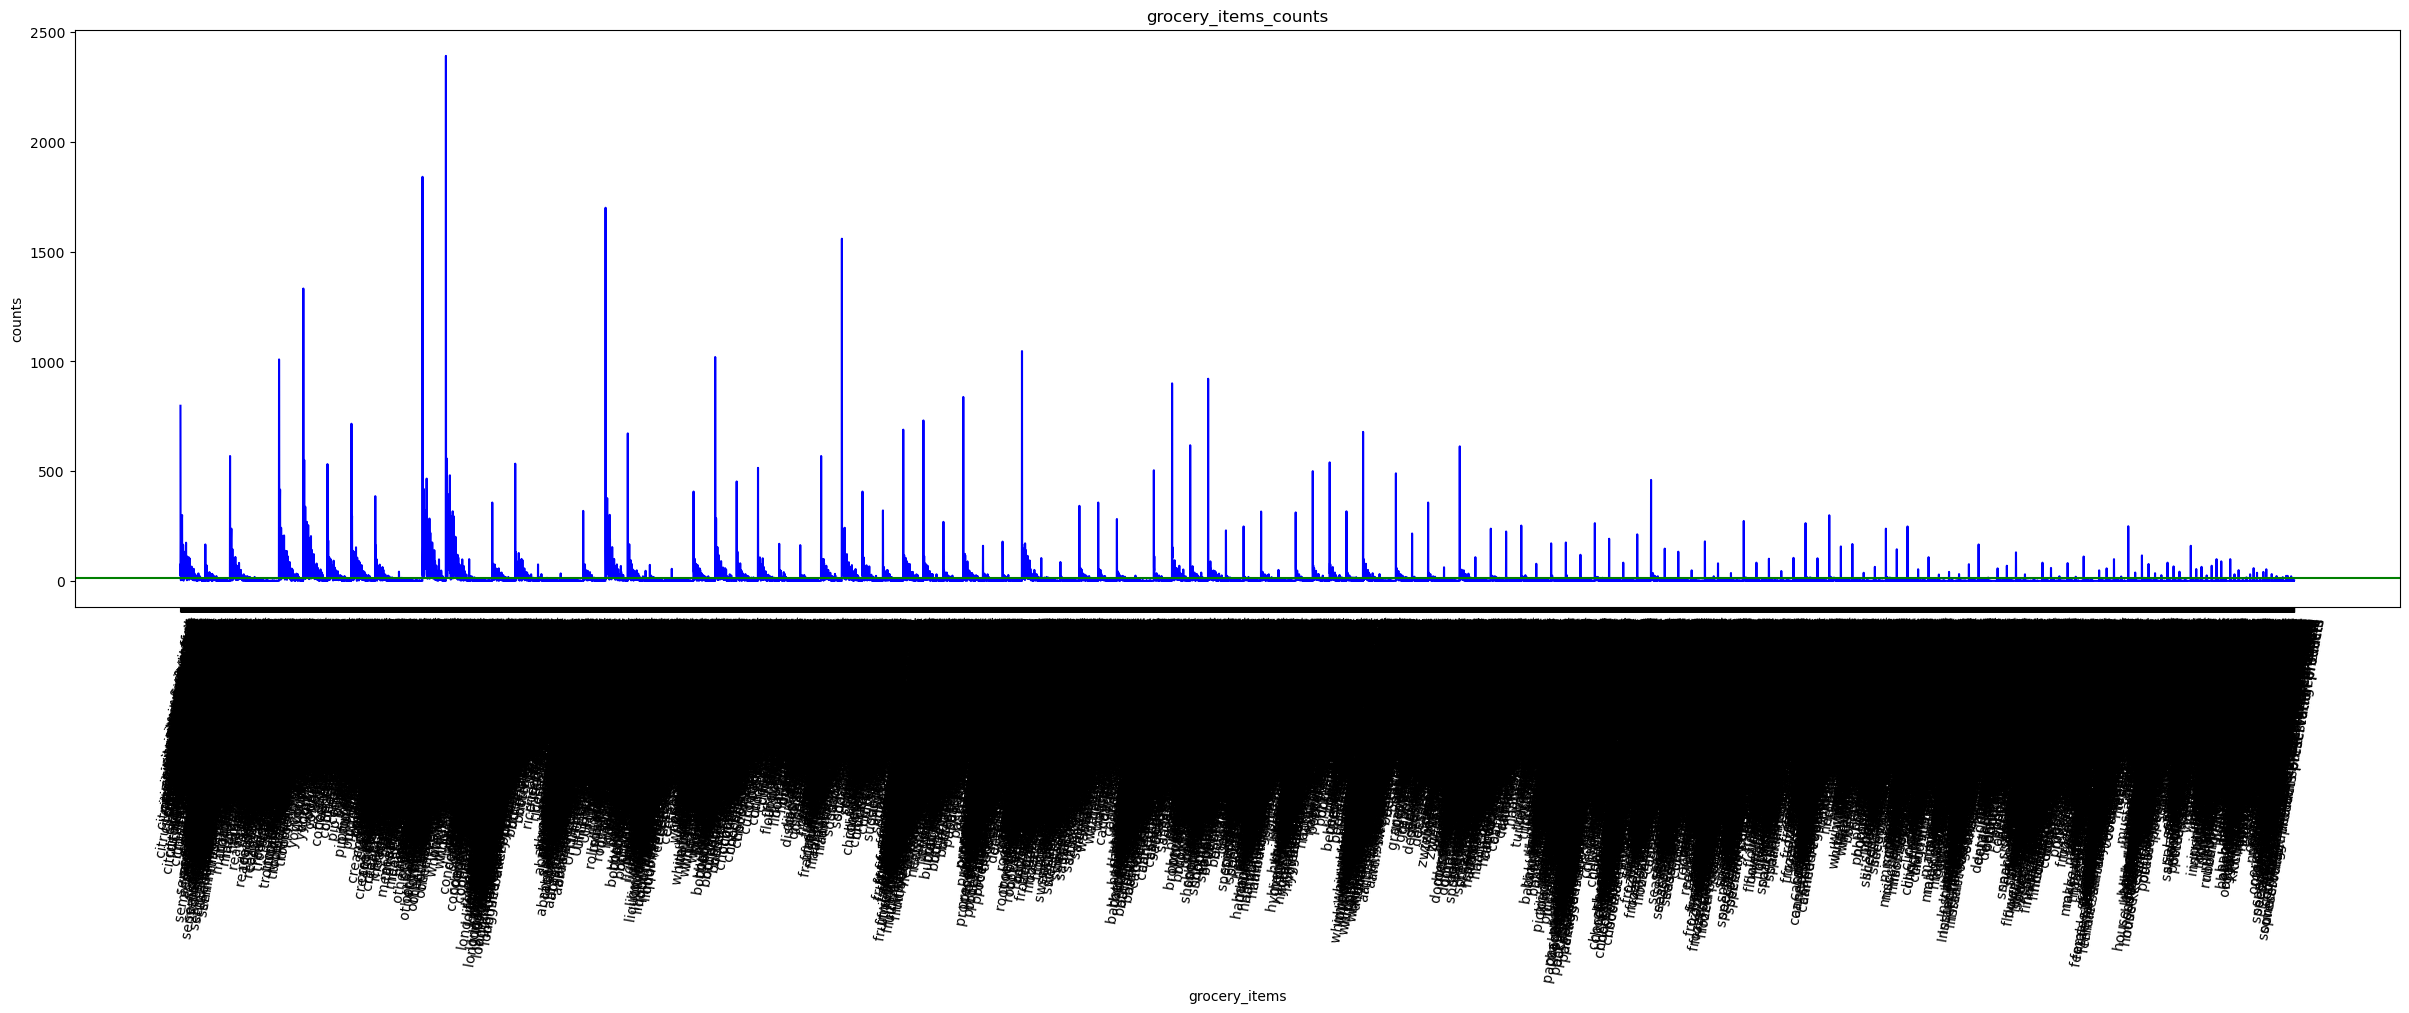

In [ ]:

plt.figure(figsize=(17,7.5))
plt.plot(grocery_items, counts, color = 'blue')
plt.xlabel('grocery_items')
plt.ylabel('counts')
plt.title('grocery_items_counts')
plt.xticks(grocery_items)

plt.axhline(y = counts.mean(), color = 'green')

plt.xticks(rotation = 80)
plt.show()

In [ ]:
item_combos = itertools.combinations_with_replacement(unique_items, 2)
counter = {}
for a, b in item_combos:
    for bag in cleaned_list_of_row_values:
        if a in bag and b in bag:
            counter[a,b] +=1


KeyError: ('citrus fruit', 'citrus fruit')

In [ ]:
import pandas as pd
import itertools

data = r"C:\Users\isaac\Documents\groceries - groceries.csv"

def process_data(data):
    # Load the DataFrame
    df = pd.read_csv(data)

    # Clean up column names by stripping any extra spaces
    df.columns = df.columns.str.strip()

    # Make a list of item column names
    columns_as_string = "Item 1	Item 2	Item 3	Item 4	Item 5	Item 6	Item 7	Item 8	Item 9	Item 10	Item 11	Item 12	Item 13	Item 14	Item 15	Item 16	Item 17	Item 18	Item 19	Item 20	Item 21	Item 22	Item 23	Item 24	Item 25	Item 26	Item 27	Item 28	Item 29	Item 30	Item 31	Item 32"
    columns_as_list = columns_as_string.split('\t')

    # Check if all expected column names exist in the dataframe
    missing_columns = [col for col in columns_as_list if col not in df.columns]
    if missing_columns:
        print(f"Warning: The following expected columns are missing: {missing_columns}")
    
    # Only include rows where item count, the first column, is two or more
    processed_df = df.loc[df.iloc[:, 0] > 2]

    # Make new columns for each possible column combination
    item_column_combinations = itertools.combinations(columns_as_list, 2)

    for column_a, column_b in item_column_combinations:
        if column_a in processed_df.columns and column_b in processed_df.columns:
            processed_df[f'{column_a}_and_{column_b}_pair'] = (
                processed_df[column_a].astype(str) + '-' + processed_df[column_b].astype(str)
            )

    # Drop individual item columns, leaving only our item combo columns
    processed_df.drop(columns=columns_as_list, inplace=True, errors='ignore')

    # Extract unique items from the original columns
    unique_items = set()
    for col in columns_as_list:
        # Exclude placeholders like "0" or NaN
        unique_items.update(df[col].dropna().loc[df[col] != "0"].astype(str).unique())

    return processed_df, list(unique_items)

def check(processed_df, column_name, item_a, item_b):
    # Check if either "item_a-item_b" or "item_b-item_a" exists in the column
    pair_1 = f"{item_a}-{item_b}"
    pair_2 = f"{item_b}-{item_a}"
    return pair_1 in processed_df[column_name].values or pair_2 in processed_df[column_name].values

# Process the data
processed_df, unique_items = process_data(data)

# Loop through all unique combinations of items
for item_a, item_b in itertools.combinations(unique_items, 2):
    all_not_found = True  # Initialize flag to True for each pair
    
    # Check across all columns in the processed dataset
    for column_name in processed_df.columns:
        if check(processed_df, column_name, item_a, item_b):
            # If pair is found in the current column, set flag to False
            all_not_found = False
            break  # No need to check further if pair is found
    
    # If the pair is not found in any column, print a message
    if all_not_found:
        print(f"{item_a}, {item_b} not found in data")
